In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Hotels.csv")

In [3]:
df.head()

,stay_date,num_days,r1,r3,r2,rv_1,rv_3,rv_2,as_of_date,HotelID
0,2020-05-01,-2,8,17,9,2420.0,5060.0,2640.0,2020-05-03,x10106
1,2020-05-01,-1,8,17,9,2420.0,5060.0,2640.0,2020-05-02,x10106
2,2020-05-01,0,17,17,0,5060.0,5060.0,-0.0,2020-05-01,x10106
3,2020-05-01,1,24,17,-7,5280.0,5060.0,-220.0,2020-04-30,x10106
4,2020-05-01,2,24,17,-7,5280.0,5060.0,-220.0,2020-04-29,x10106


In [4]:
df.dtypes

stay_date      object
num_days        int64
r1              int64
r3              int64
r2              int64
rv_1          float64
rv_3          float64
rv_2          float64
as_of_date     object
HotelID        object
dtype: object

In [5]:
df.HotelID.value_counts()
## HotelId is not unique

x65663    34280
x65669    33811
x3697     33363
x1619     33277
x36       32292
          ...  
x56156    20551
x16093    20350
x65649    20282
x49775    20247
x41599    20210
Name: HotelID, Length: 100, dtype: int64

In [6]:
## Question1 Each hotel must be identified with unique Hotel id 
df['HotelID'].nunique()

100

In [7]:
## Question2  Distinct Stay dates for every hotel
df.groupby('HotelID').agg({'stay_date' :'count', 'stay_date': 'nunique'})

,stay_date
HotelID,
x10106,90
x105,71
x11082,90
x12056,56
x12144,76
...,...
x8468,90
x8616,82
x8823,60


In [8]:
## Question 3:  Mean , Median for num_days for every hotel_id
df2 =df.groupby('HotelID').num_days.agg(['mean', 'median']).astype(int)

<AxesSubplot:>

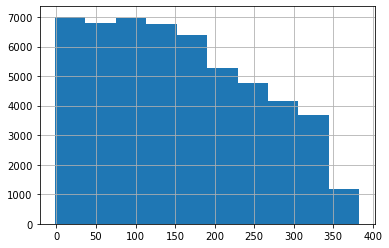

In [9]:
##a) Plot the histogram of num_days of hotels 'x11082' and 'x36'
df.loc[(df.HotelID=='x11082') | (df.HotelID=='x36'), 'num_days'].hist()

In [10]:
## b Create a column called "Skewness" with three categories ("Right-tailed", "Left-tailed" and "No skew") 
# based on mean, median of "num_days" created in Step 3. 
# How many hotels' num_days are "Right-tailed", "Left-tailed" and "No skew" ?

In [11]:
conditions = [
    (df2['mean'] == df2['median']),
    (df2['mean'] > df2['median']),
    (df2['mean'] < df2['median']) 
]

In [12]:
values = ["Right-tailed", "Left-tailed", "No skew"]

In [13]:
import numpy as np

In [14]:
df2['Skewness']=np.select(conditions, values)

In [15]:
df2

,mean,median,Skewness
HotelID,,,
x10106,130,126,Left-tailed
x105,152,151,Left-tailed
x11082,121,114,Left-tailed
x12056,238,237,Left-tailed
x12144,152,151,Left-tailed
...,...,...,...
x8468,138,134,Left-tailed
x8616,164,161,Left-tailed
x8823,178,177,Left-tailed


In [16]:
df2.groupby('Skewness').count()

,mean,median
Skewness,,
Left-tailed,93,93
No skew,1,1
Right-tailed,6,6


In [17]:
## 5 
# a) With as_of_date "2020-06-01", select the top 10 hotels with the highest average r2 in June 2020
df3 = df.loc[df.as_of_date == "2020-06-01"].groupby("HotelID").r2.mean()

In [18]:
Hotels_10=df3.sort_values(ascending=False).head(10)

In [19]:
# Filter 1- 10 Hotels
list_h = Hotels_10.index.tolist()

In [20]:
list_h

['x38',
 'x46',
 'x37',
 'x36',
 'x14287',
 'x65754',
 'x14690',
 'x1617',
 'x65807',
 'x12144']

In [21]:
# Filter 2, only June month dates
df['Month']= pd.DatetimeIndex(df['stay_date']).month

In [22]:
# b) With as_of_date "2020-06-01", for the top 10 hotels from above, plot time series graphs of r1 and r2 in June 2020 
# (total of 10 graphs)

#● stay_date on x axis
#● r1andr2onyaxis
#● title as hotel_id

## NOTE: ​The time series should have all calendar dates in June. If some calendar dates are missing in June, 
## add them in the plot and the corresponding r1 and r2 for those missing dates should be zero

In [23]:
## Checking all calender dates of June ## use for testing
df.loc[(df.HotelID == 'x38') & (df.Month == 6) & (df.as_of_date == "2020-06-01")].stay_date.nunique()

27

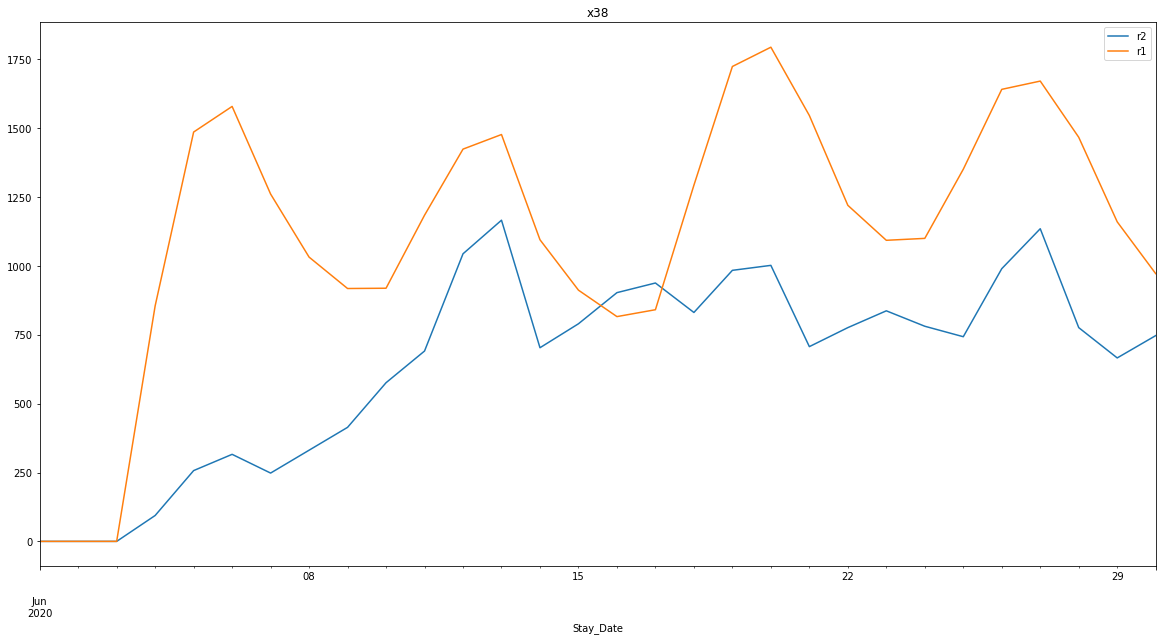

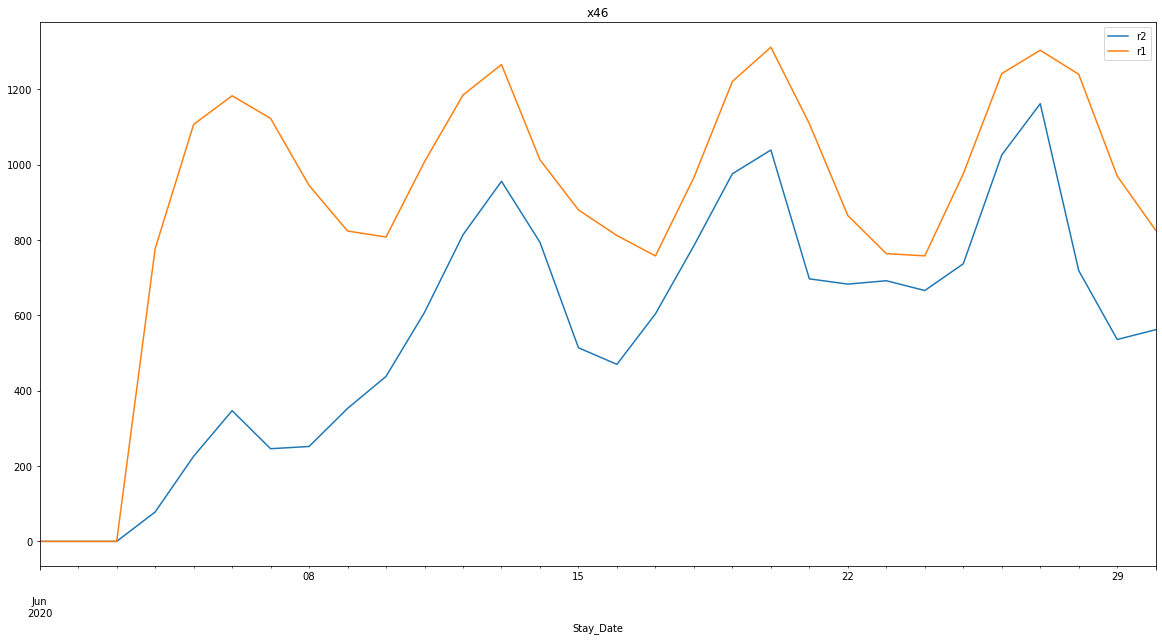

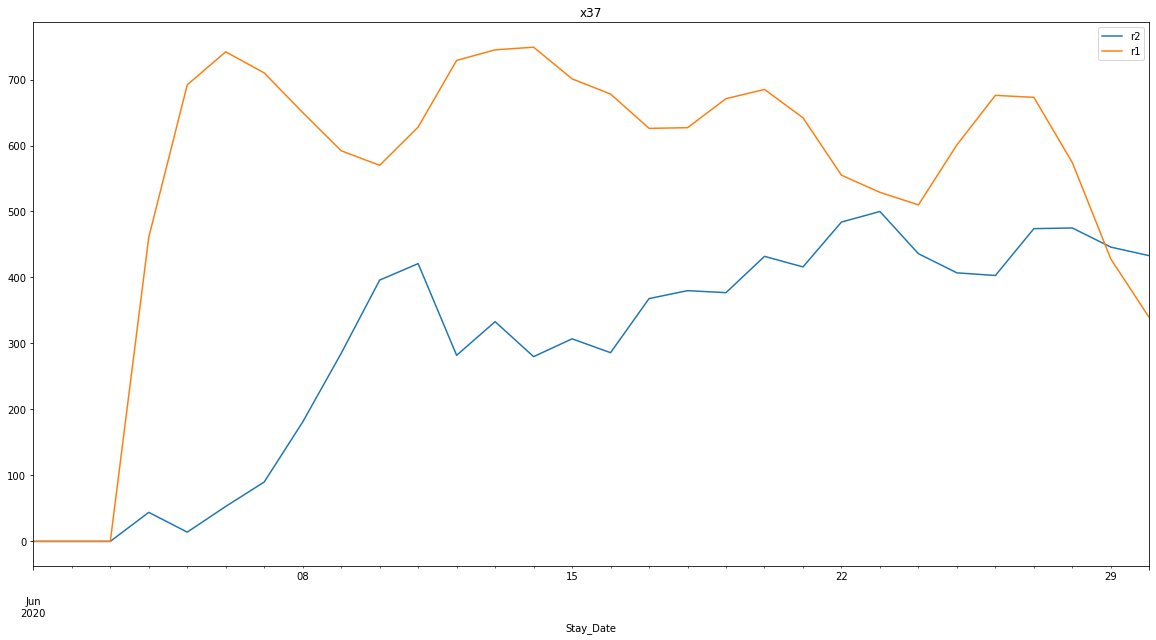

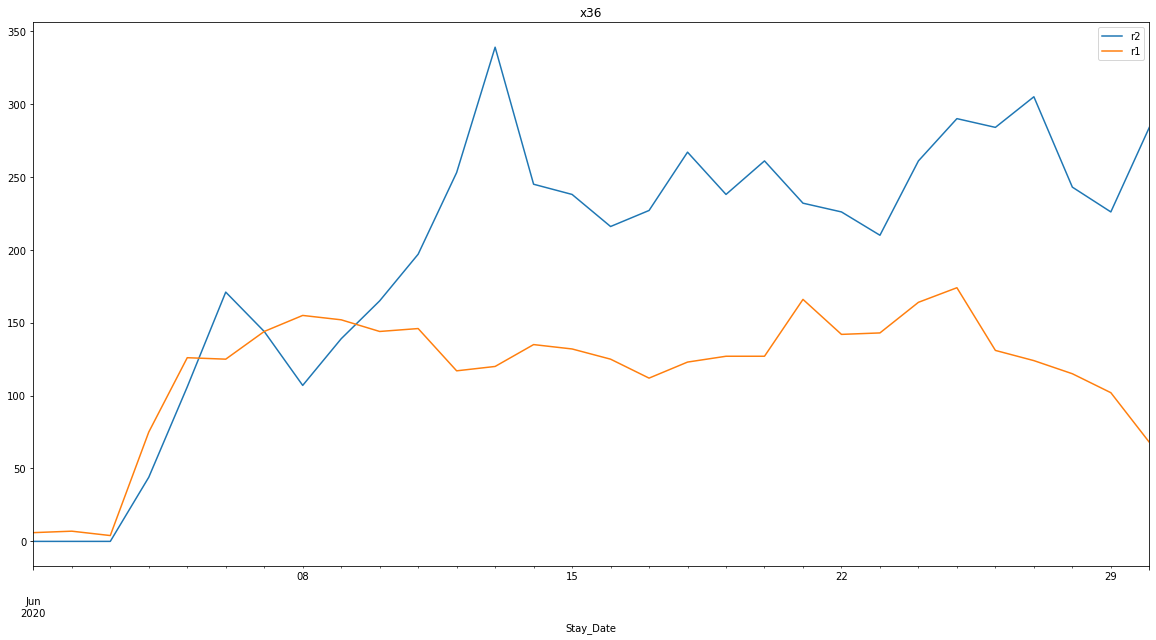

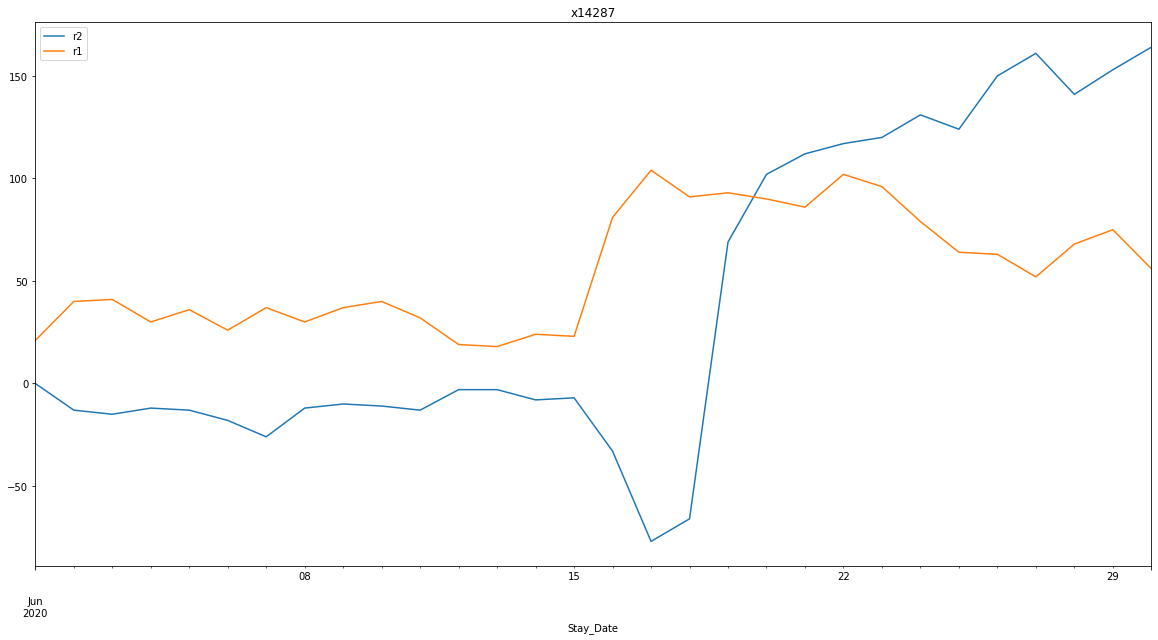

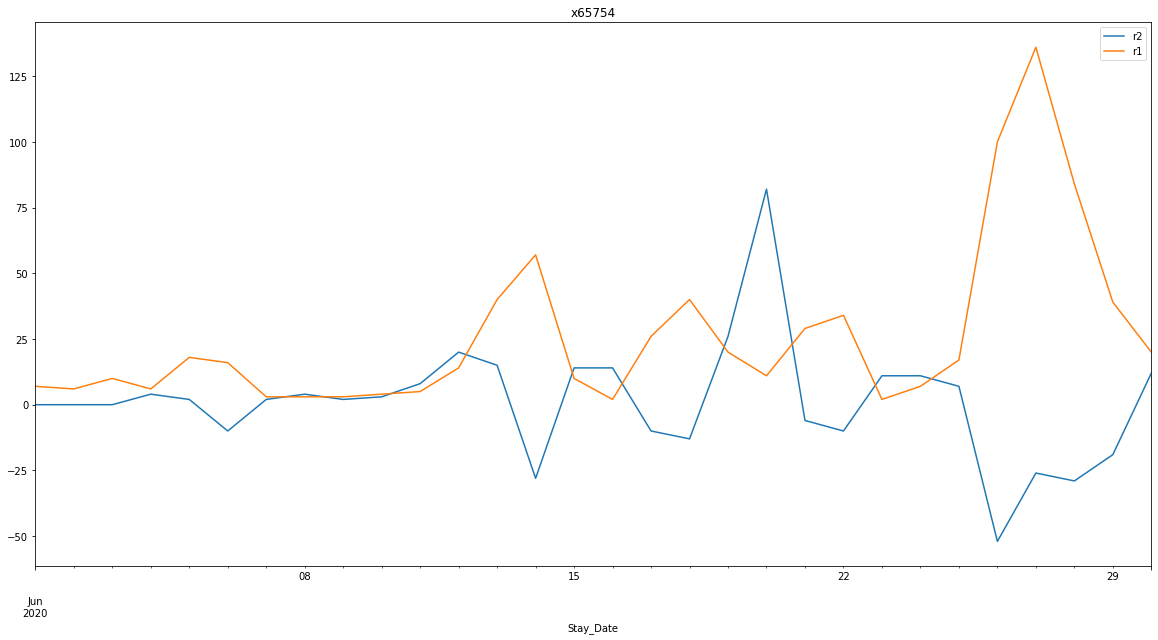

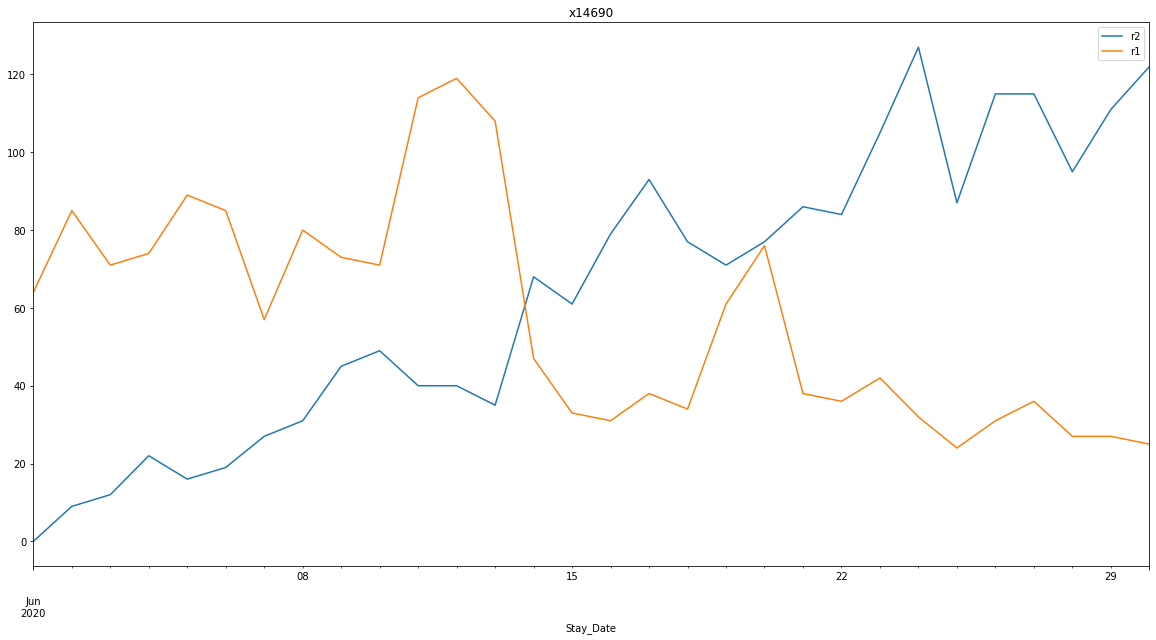

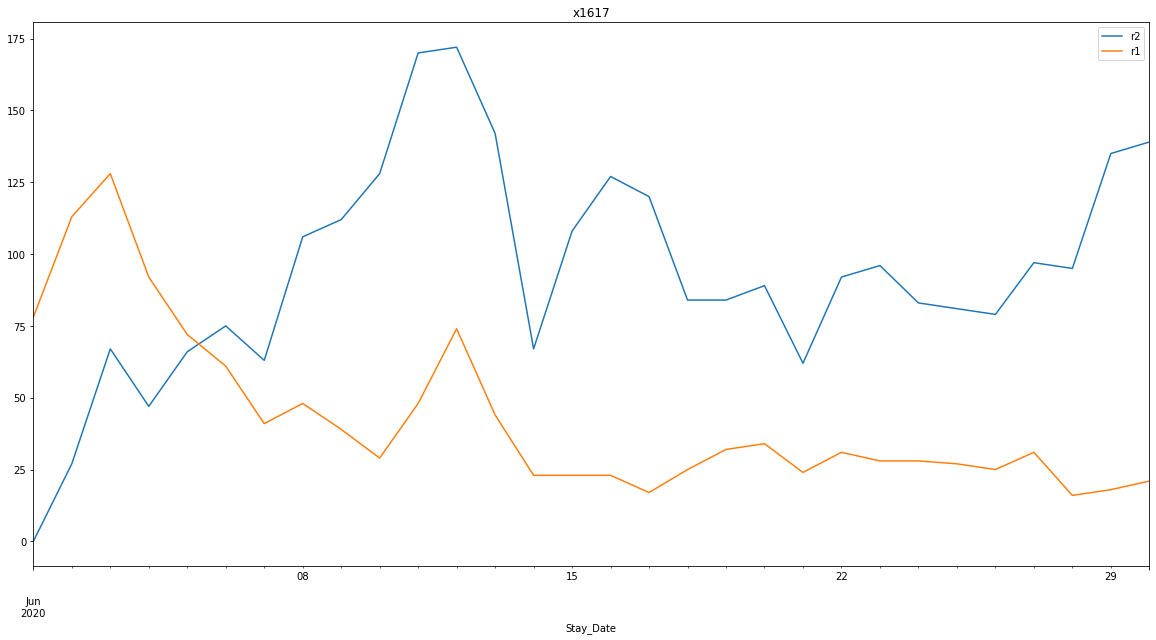

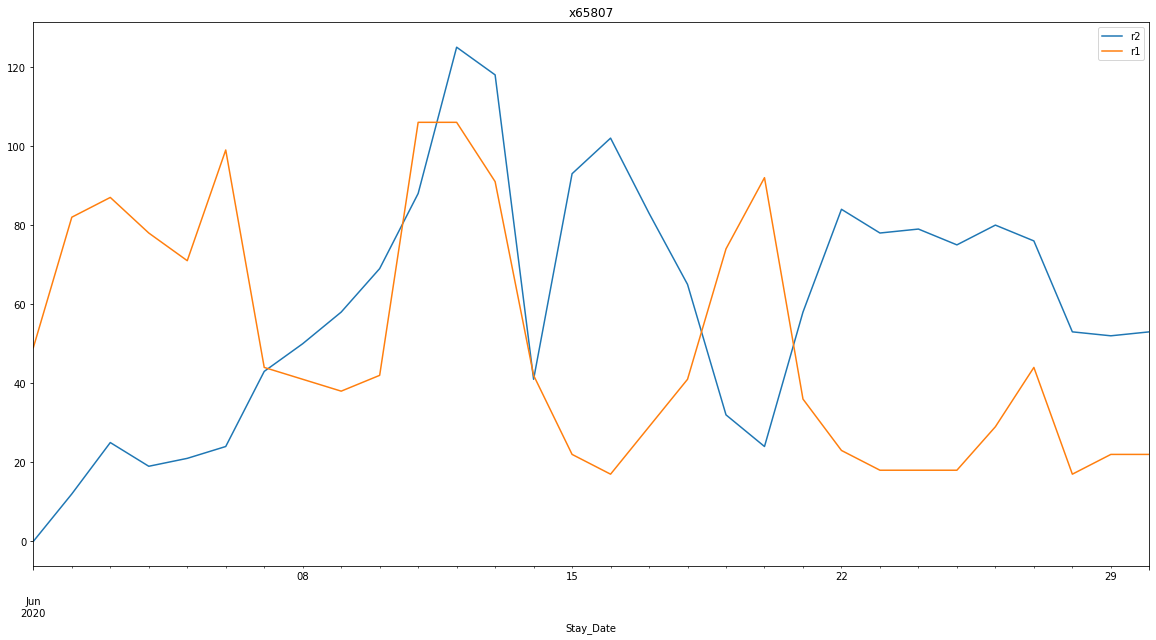

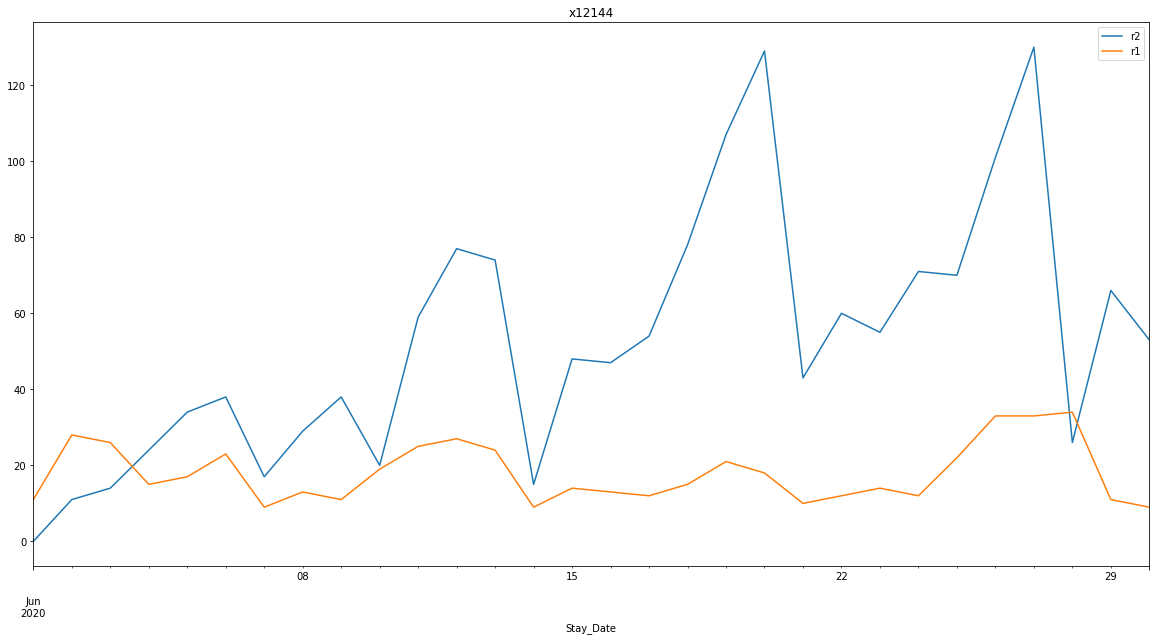

In [24]:
for h in list_h:
    df_filtered = df.loc[ (df.as_of_date == "2020-06-01") & (df.Month == 6) & (df.HotelID == h), ['r2', 'r1', 'stay_date']]
    
    ## Need to create new records for missing dates, with r1 and r2 having zero values
    
    new_index = pd.date_range(start="2020-06-01",end="2020-06-30", freq='D')
    
    df_filtered.index = pd.DatetimeIndex(df_filtered.stay_date, freq='D' )

    df_filtered =  df_filtered.reindex(new_index)
    
    df_filtered.fillna(0.0, inplace=True)
    
    df_filtered.reset_index(inplace=True)
    
    df_filtered= df_filtered.rename(columns = {'index':'Stay_Date'})
    
    df_filtered.plot(x='Stay_Date', y=['r2', 'r1'], figsize=(20, 10), title=h)